In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [45]:
df = pd.read_csv('../data/processed/dados_processados.csv', sep=';')

In [46]:
df.head()

,Data,Selic,Juros,Credito
0,01/2015,11.82,31.39,130.957
1,02/2015,12.15,32.23,114.736
2,03/2015,12.58,32.51,136.861
3,04/2015,12.68,33.24,129.652
4,05/2015,13.15,34.18,128.876


In [47]:
# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'], format='%m/%Y')

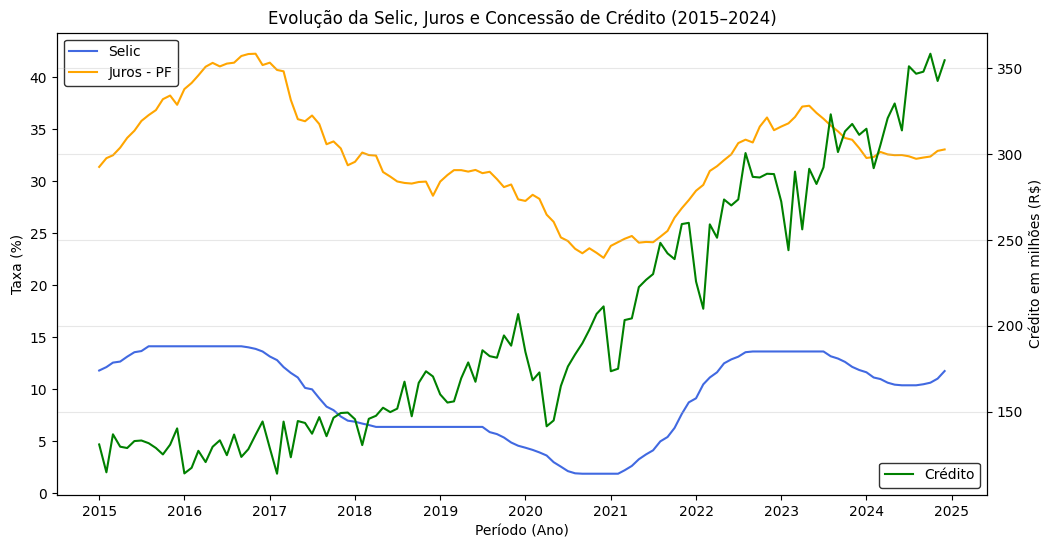

In [48]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Período (Ano)')
ax1.set_ylabel('Taxa (%)')
ax1.plot(df['Data'],df['Selic'], color='royalblue', label='Selic')
ax1.plot(df['Data'],df['Juros'], color='orange', label='Juros - PF')
ax1.legend(edgecolor='black', loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Crédito em milhões (R$)')
ax2.plot(df['Data'],df['Credito'], color='green', label='Crédito')
ax2.legend(edgecolor='black',loc='lower right')
plt.grid(alpha=0.3)
plt.title('Evolução da Selic, Juros e Concessão de Crédito (2015–2024)')

plt.show()

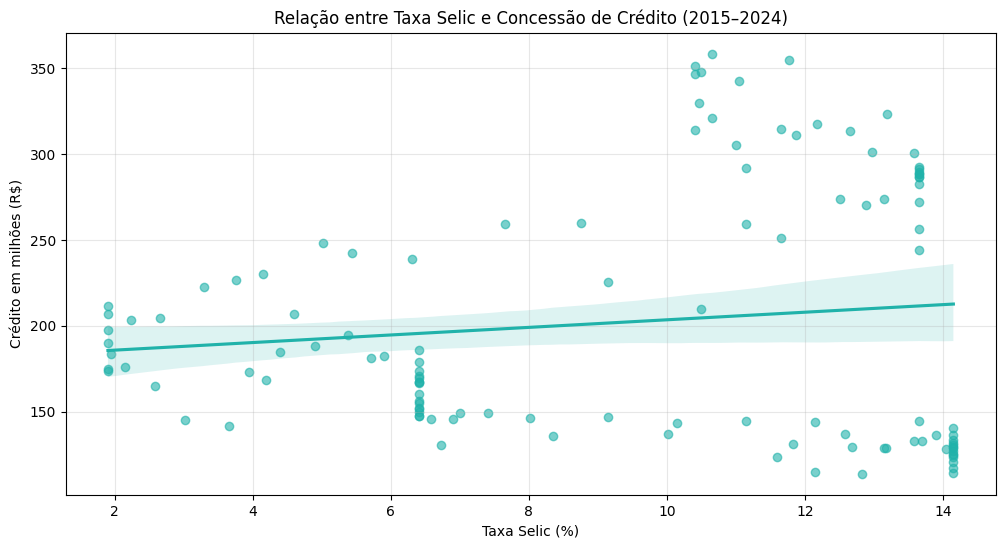

In [49]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Selic', y='Credito', data=df, color='lightseagreen',scatter_kws={'alpha':0.6})
plt.xlabel('Taxa Selic (%)')
plt.ylabel('Crédito em milhões (R$)')

plt.grid(alpha=0.3)
plt.title('Relação entre Taxa Selic e Concessão de Crédito (2015–2024)')

plt.show()

In [50]:
# Análise de correlação entre Selic e Crédito - PF
corr = df[['Selic', 'Credito']].corr()
print(f'Corelação linear\n', corr)

Corelação linear
             Selic   Credito
Selic    1.000000  0.125958
Credito  0.125958  1.000000


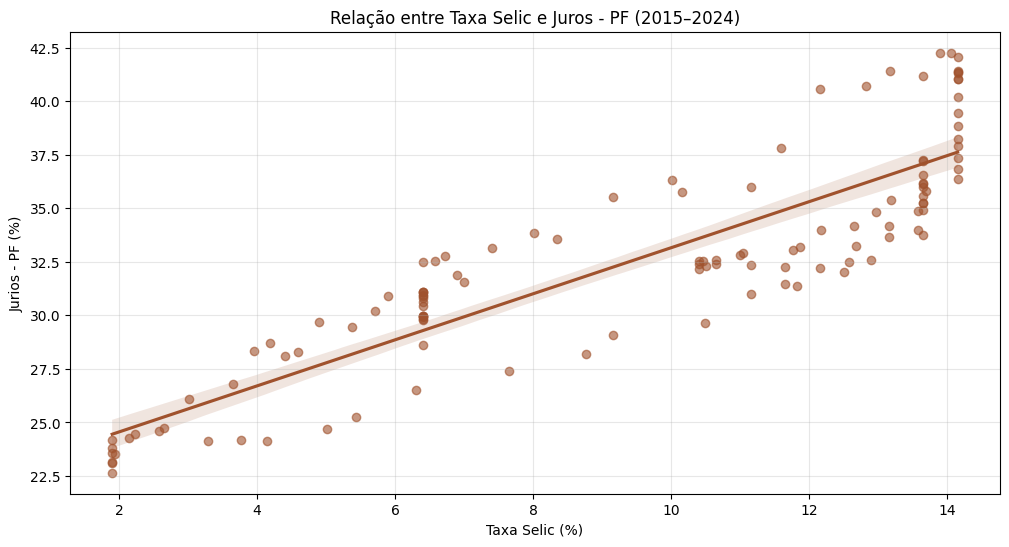

In [51]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Selic', y='Juros', data=df, color='sienna',scatter_kws={'alpha':0.6})
plt.xlabel('Taxa Selic (%)')
plt.ylabel('Jurios - PF (%)')

plt.grid(alpha=0.3)
plt.title('Relação entre Taxa Selic e Juros - PF (2015–2024)')

plt.show()


In [52]:
# Análise de correlação entre Selic e Juros - PF
corr = df[['Selic', 'Juros']].corr()
print(f'Corelação linear\n', corr)

Corelação linear
           Selic     Juros
Selic  1.000000  0.880416
Juros  0.880416  1.000000


In [53]:
# Regressão Linear com statsmodels para descobrir sensibilidade
x = df['Selic']
y = df['Juros']

x = sm.add_constant(x) 

model_sm = sm.OLS(y, x).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Juros   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     406.8
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           4.82e-40
Time:                        22:38:33   Log-Likelihood:                -273.46
No. Observations:                 120   AIC:                             550.9
Df Residuals:                     118   BIC:                             556.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4044      0.545     41.130      0.0

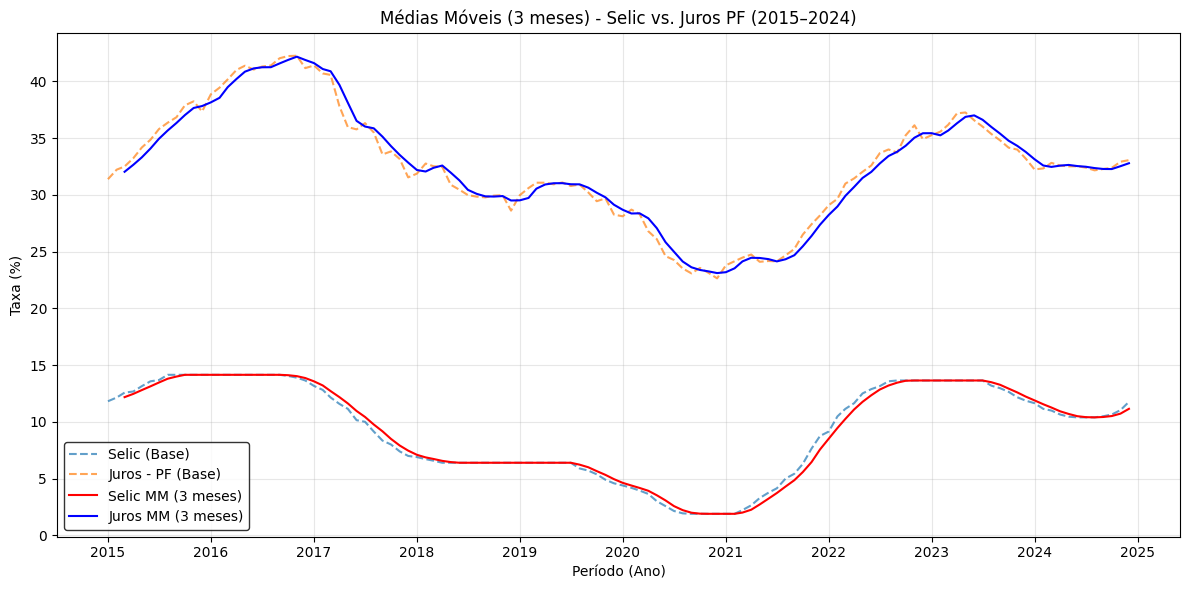

In [54]:
# Análise de médias móveis 
df_mm = df.copy()

df_mm['Selic_MM_3'] = df_mm['Selic'].rolling(window=3).mean()
df_mm['Juros_MM_3'] = df_mm['Juros'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(df_mm['Data'], df_mm['Selic'], label='Selic (Base)', alpha=0.7, linestyle='--')
plt.plot(df_mm['Data'], df_mm['Juros'], label='Juros - PF (Base)', alpha=0.7, linestyle='--')
plt.plot(df_mm['Data'], df_mm['Selic_MM_3'], label='Selic MM (3 meses)', color='red')
plt.plot(df_mm['Data'], df_mm['Juros_MM_3'], label='Juros MM (3 meses)', color='blue')

plt.xlabel('Período (Ano)')
plt.ylabel('Taxa (%)')
plt.legend(edgecolor='black')
plt.grid(alpha=0.3)
plt.title('Médias Móveis (3 meses) - Selic vs. Juros PF (2015–2024)')
plt.tight_layout()

plt.show()

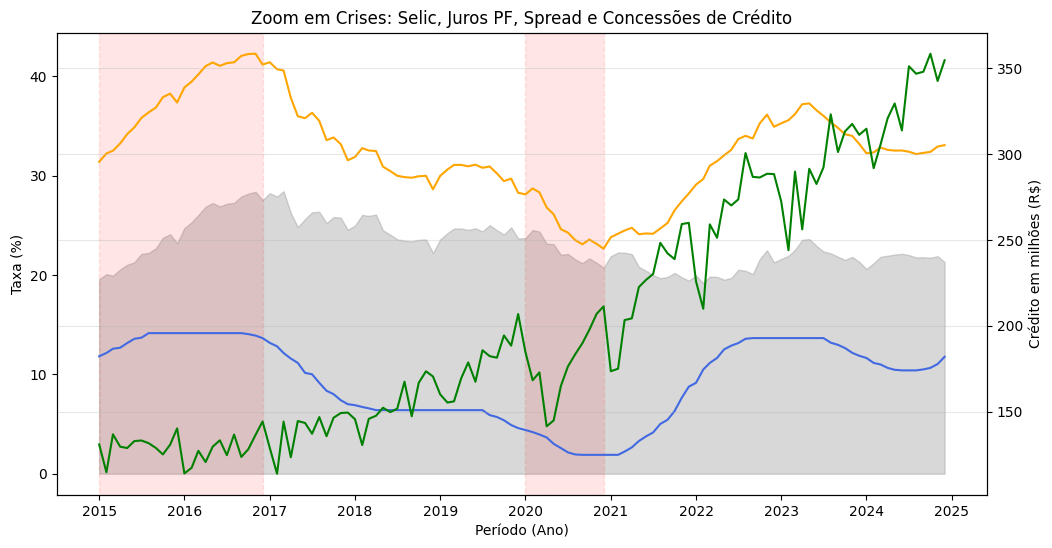

In [55]:
crises = {
  'Recessão 15-16': (pd.to_datetime('01/2015', format='%m/%Y'), pd.to_datetime('12/2016', format='%m/%Y')),
    'Pandemia 2020': (pd.to_datetime('01/2020', format='%m/%Y'), pd.to_datetime('12/2020', format='%m/%Y'))  
}

df_crises = df.copy()

df_crises['Spread'] = df_crises['Juros'] - df_crises['Selic']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Período (Ano)')
ax1.set_ylabel('Taxa (%)')
ax1.plot(df_crises['Data'], df_crises['Selic'], label='Selic', color='royalblue')
ax1.plot(df_crises['Data'], df_crises['Juros'], label='Juros PF', color='orange')

plt.fill_between(df_crises['Data'], df_crises['Spread'], color='gray', alpha=0.3, label='Spread (Juros - Selic)')

for crise, (start, end) in crises.items():
    plt.axvspan(start, end, color='red', alpha=0.1, label=f'{crise}',linestyle='--')

ax2 = ax1.twinx()
ax2.set_ylabel('Crédito em milhões (R$)')
ax2.plot(df_crises['Data'], df_crises['Credito'], color='green', label='Concessões de Crédito')

#fig.legend(loc="lower right",bbox_to_anchor=(0.1,0.9))
plt.grid(alpha=0.3)
plt.title('Zoom em Crises: Selic, Juros PF, Spread e Concessões de Crédito')

plt.show()